In [248]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [249]:
df= pd.read_csv('credit_card_customers.csv')
df.head(5)

,Unnamed: 0,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


CLIENTNUM: mã khách hàng.

Attrition_Flag: trạng thái hoạt động của thẻ tín dụng. Existing customer: khách hàng vẫn còn sử dụng thẻ tín dụng; Attrited customer: khách hàng đã rời bỏ thẻ tín dụng.

Customer_age: tuổi của khách hàng (tính theo năm).

Gender: giới tính của khách hàng (M: Nam, F: nữ).

Dependent_Count: Số người phụ thuộc trong gia đình.

Education_Level: trình độ học vấn (Graduate: Đại học, High school: tốt nghiệp THPT ,Uneducated: không đi học ,College: cao đẳng, Post-graduate: sau đại học, Doctorate: 
tiến sĩ , Unknown: khác )

Marital_Status: tình trạng hôn nhân (Single: độc thân, Divorced: ly hôn, Married: Kết hôn)

Income_Category: thu nhập hàng năm (Less than $40K, $40k-$60k, $60K-$80K, $80k-$120k, $120k +, Unknown)

Card_Category: Loại thẻ tín dụng ( Blue, Silver, Gold, Platium).

Months_on_book: thời gian quan hệ với ngân hàng (Period of relationship with bank)

Total_Relationship_Count: tổng số sản phẩm mà khách hàng nắm giữ.

Months_Inactive_12_mon: số tháng không sử dụng thẻ trong 12 tháng qua.

Contacts_Count_12_mon: số lần liên hệ giữa khách hàng và ngân hàng trong 12 tháng qua.

Credit_Limit: hạn mức tín dụng

Total_Revolving_Bal: tổng tín dụng quay vòng

Total_Amt_Chng_Q4_Q1: thay đổi tổng mức chi tiêu thẻ tín dụng (Q4 so với Q1)

Total_Trans_Amt: tổng mức chi tiêu thẻ tín dụng (12 tháng qua)

Total_Trans_Ct: tổng số lượng giao dịch (12 tháng qua)

Total_Ct_Chnq_Q4_Q1: thay đổi tổng số giao dịch (Q4 so với Q1)

AVg_Utilization_Ratio: tỷ lệ chi tiêu thẻ trung bình (Số tiền đã sử dụng/ Hạn mức tín dụng)



#### (2) **Kiểm tra tính toàn vẹn:**
    + Dữ liệu có Null?
    + Dữ liệu có NaN?
    + Dữ liệu có bị lặp lại?

In [250]:
df.dtypes

Unnamed: 0                    int64
CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [251]:
df.Education_Level.unique()

array(['High School', 'Graduate', 'Uneducated', 'Unknown', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

In [252]:
df= df.drop('Unnamed: 0', axis = 1)

**Dữ liệu toàn vẹn**


## (3) **Thống kê mô tả**
1. Thống kê mô tả 1 biến
2. Thống kê mô tả 2 biến

In [253]:
df['Attrition_Flag'].value_counts()

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

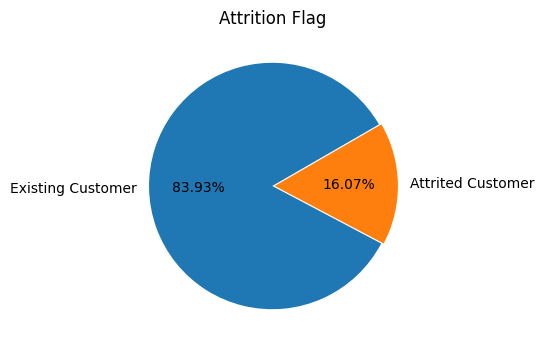

In [254]:
so_khach_o_lai = df['Attrition_Flag'].value_counts()

plt.figure(figsize=(9,4))
plt.pie(so_khach_o_lai, labels=so_khach_o_lai.index, autopct='%1.2f%%',
        startangle=30, explode=[0, 0.02])
plt.title('Attrition Flag')

plt.show()

Có 1627 khách rời khỏi chiếm khoảng 16.07 % lượng khách hàng. Tuy không lớn nhưng cũng có thể thấy được sự thay đổi của khách hàng. Và cũng gây khó khăn trong dự báo khi dữ liệu không căn bằng.

  Gender  count    percent
0      F   5358  52.908068
1      M   4769  47.091932


<Figure size 1000x600 with 0 Axes>

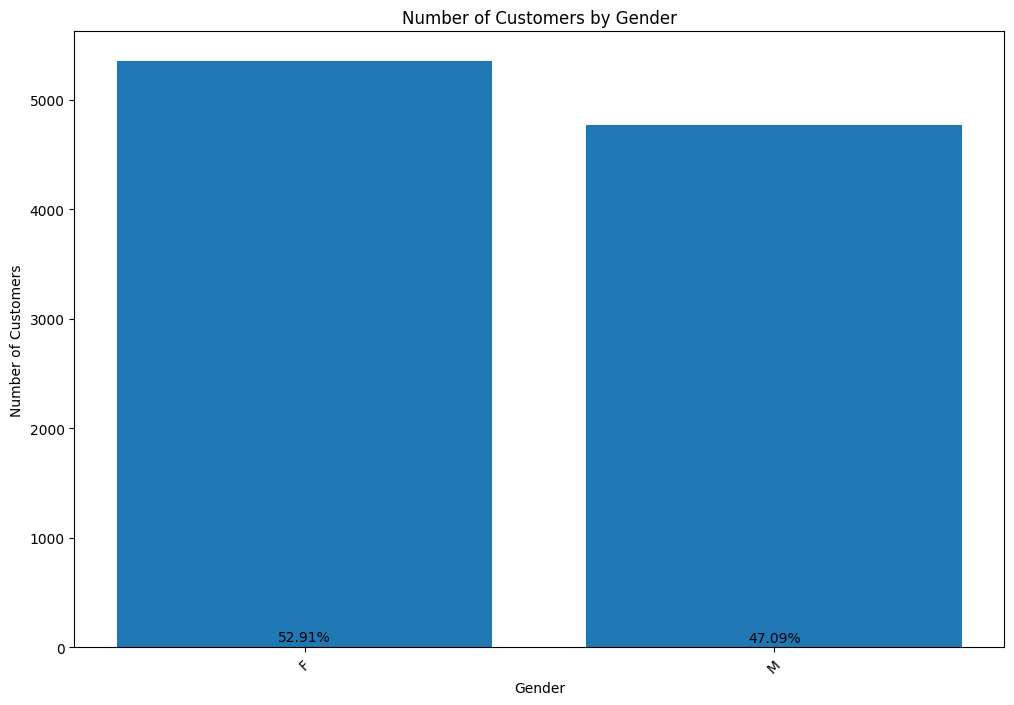

  Education_Level  count    percent
0        Graduate   3128  30.887726
1     High School   2013  19.877555
2         Unknown   1519  14.999506
3      Uneducated   1487  14.683519
4         College   1013  10.002962
5   Post-Graduate    516   5.095290
6       Doctorate    451   4.453441


<Figure size 1000x600 with 0 Axes>

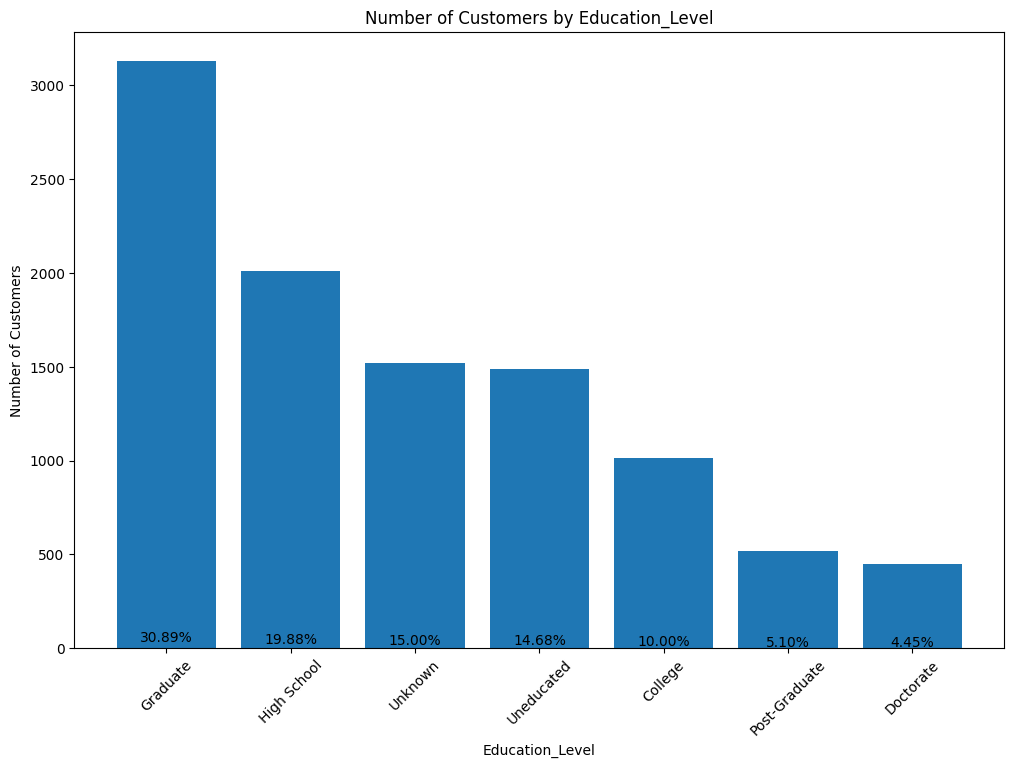

  Marital_Status  count    percent
0        Married   4687  46.282216
1         Single   3943  38.935519
2        Unknown    749   7.396070
3       Divorced    748   7.386195


<Figure size 1000x600 with 0 Axes>

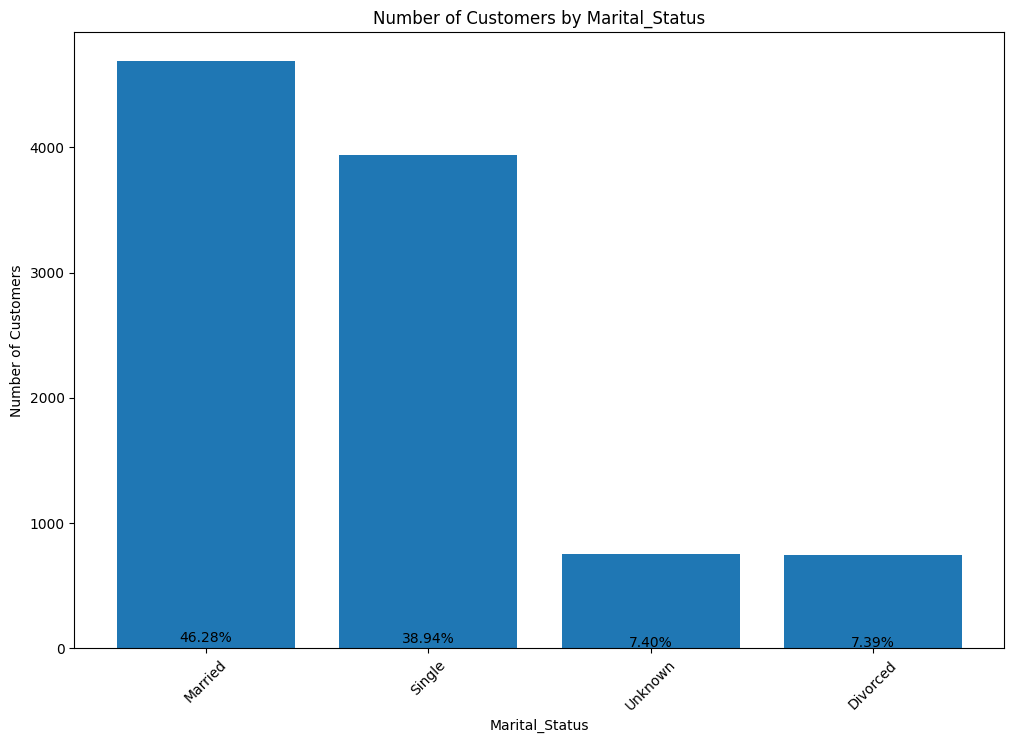

  Income_Category  count    percent
0  Less than $40K   3561  35.163425
1     $40K - $60K   1790  17.675521
2    $80K - $120K   1535  15.157500
3     $60K - $80K   1402  13.844179
4         Unknown   1112  10.980547
5         $120K +    727   7.178829


<Figure size 1000x600 with 0 Axes>

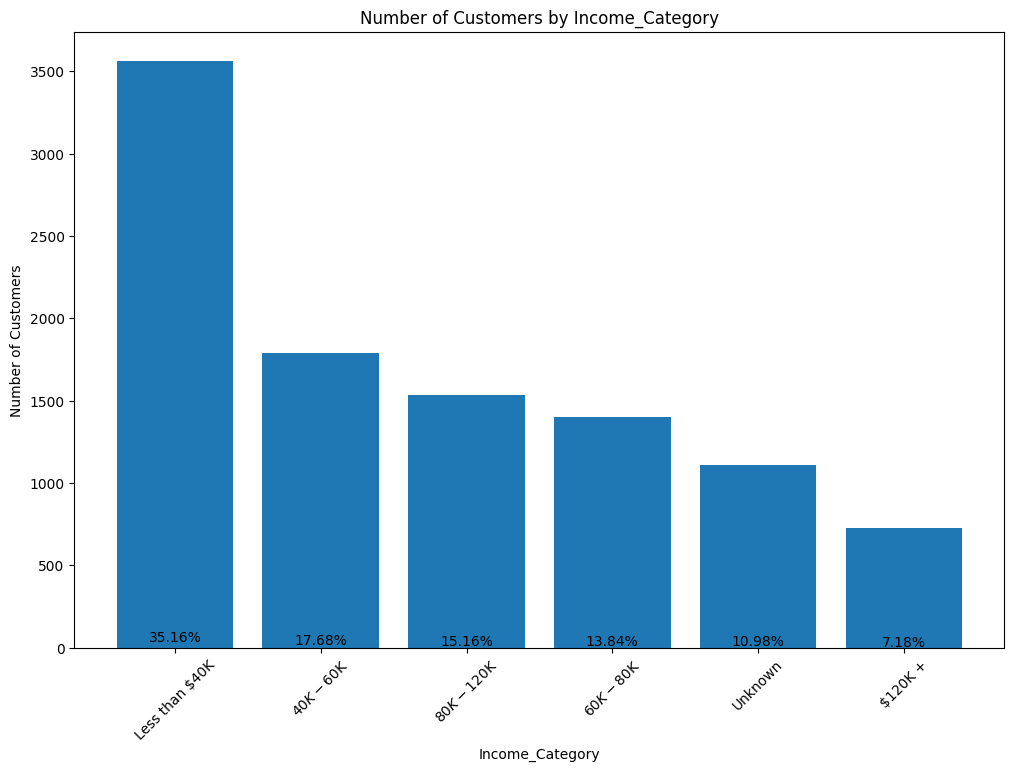

  Card_Category  count    percent
0          Blue   9436  93.176656
1        Silver    555   5.480399
2          Gold    116   1.145453
3      Platinum     20   0.197492


<Figure size 1000x600 with 0 Axes>

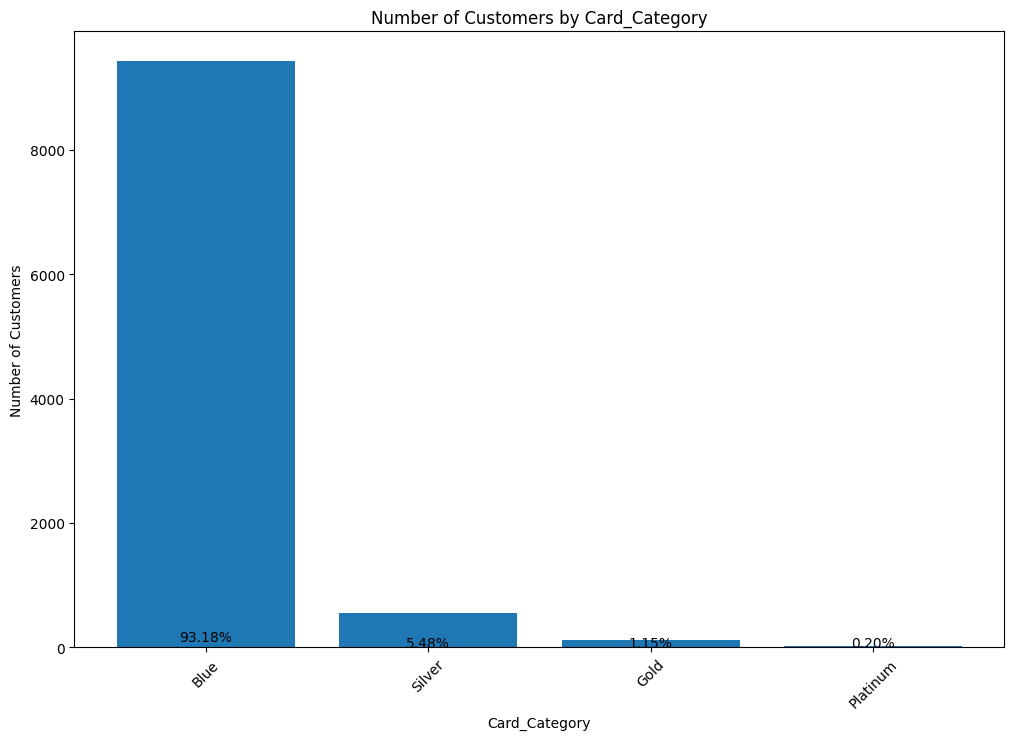

In [255]:
title_cat = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

def bar_chart(col):
    temp = df[col].value_counts()
    total = temp.sum()
    temp = temp.to_frame('count').reset_index()
    temp['percent'] = temp['count'] / total * 100

    fig, ax = plt.subplots()
    ax.bar(temp[col], temp['count'])
    ax.set_xlabel(col)
    ax.set_ylabel('Number of Customers')
    ax.set_title('Number of Customers by ' + col)

    for i, v in enumerate(temp['percent']):
        ax.text(i, v + 1, "{:0.2f}%".format(v), ha='center')
    plt.xticks(rotation=45)

    print(temp)

for i in title_cat:
    plt.figure(figsize=(10, 6))
    bar_chart(i)
    plt.show()

### Nhận xét:
    1. Giới tính khách hàng ở đây khá cân bằng .
    2. Khách hàng đã tốt nghiệp chiếm nhiều nhất
    3. Khách hàng có gia đình chiếm nhiều nhất
    4. Khách hàng thường có thu nhập thấp hơn $40K
    5. Loại thẻ đa số là Blue

In [256]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


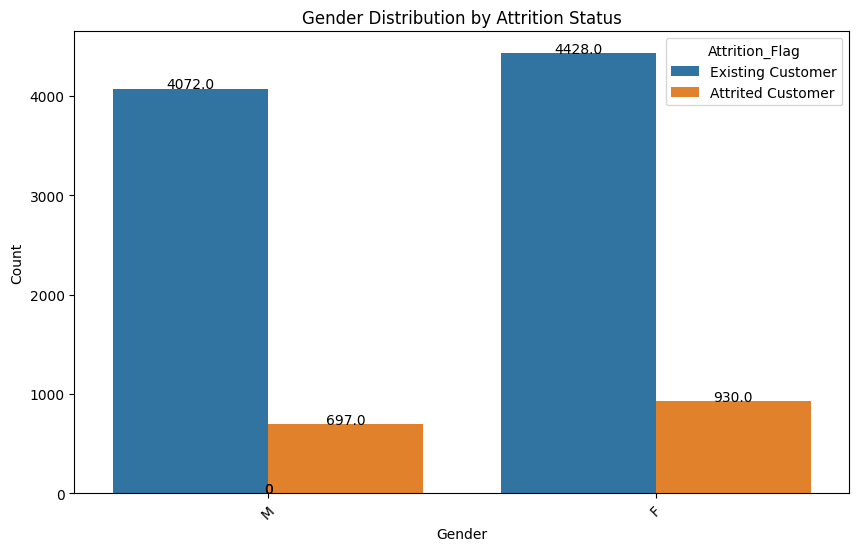

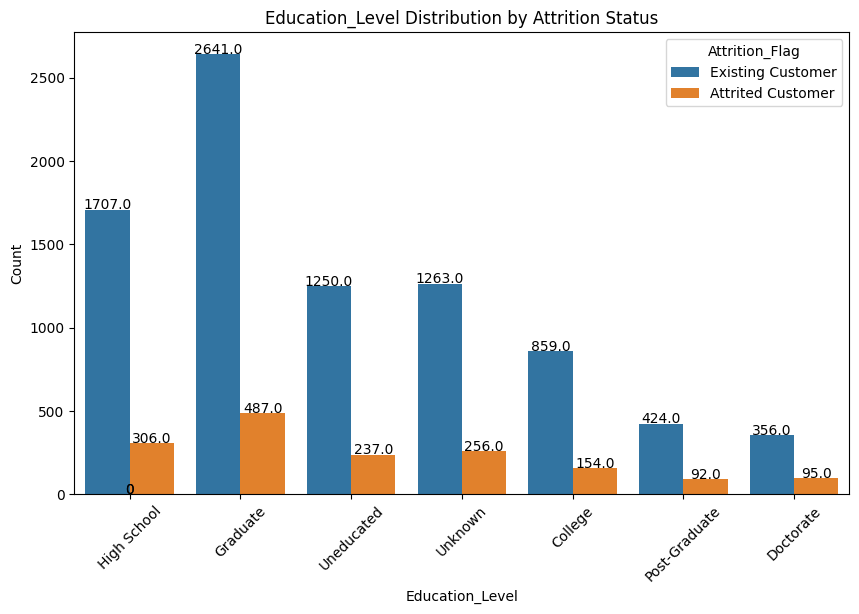

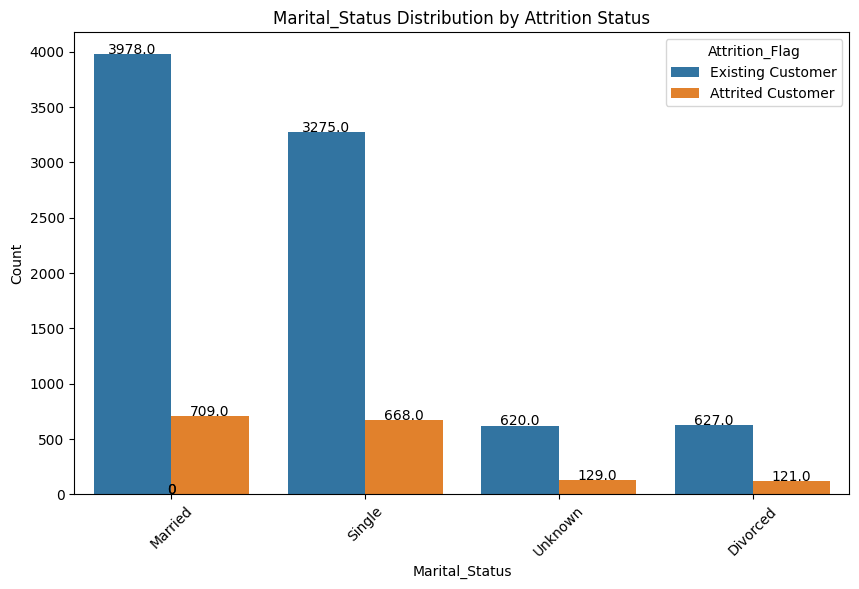

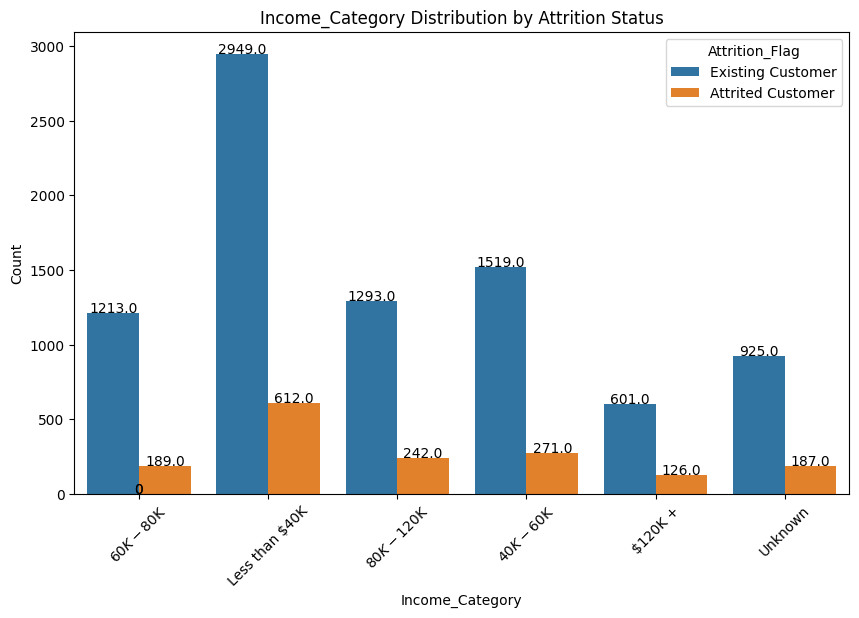

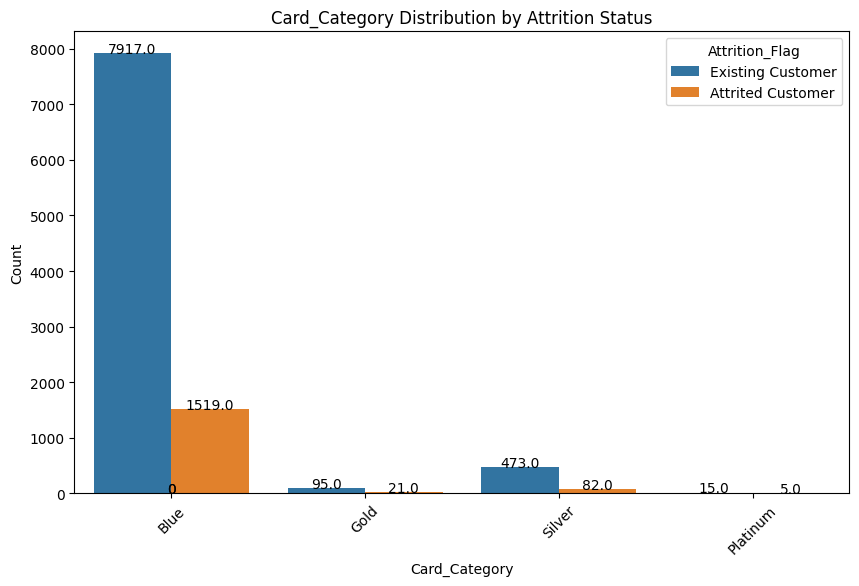

In [257]:
title_cats = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

for cat in title_cats:
    plt.figure(figsize=(10, 6))
    chart = sns.countplot(x=cat, hue='Attrition_Flag', data=df)
    plt.title(f'{cat} Distribution by Attrition Status')
    plt.xlabel(cat)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    
    # Add percentages on top of each bar
    total = len(df[cat])
    for p in chart.patches:
        height = p.get_height()
        chart.text(p.get_x()+p.get_width()/2.,height + 3, height, ha="center") 
    
    plt.show()


## Khách hàng rời bỏ theo từng biến
### (1) Giới tính:
    + 930 khách hàng nữ không còn sử dụng thẻ tín dụng và 4428 khách hàng nữ vẫn còn sử dụng thẻ tín dụng
    + 697 khách hàng nam không còn sử dụng thẻ tín dụng và 4072 khách hàng nam vẫn còn sử dụng thẻ tín dụng
    Có 42.8 phần trăm nam không còn sử thẻ và 57,2 rời bỏ thẻ

### (2) Trình độ học vấn:
    + Trong số khách hàng tốt nghiệp cao đẳng có 154 khách hàng không còn sử dụng thẻ tín dụng( rời bỏ ) trong khi 859 khách hàng vẫn còn sử dụng.
    + Trong số khách hàng tốt nghiệp tiến sĩ có 95 khách hàng không còn sử dụng thẻ tín dụng( rời bỏ ) trong khi 356 khách hàng vẫn còn sử dụng.
    + Trong số khách hàng tốt nghiệp đại học có 487 khách hàng không còn sử dụng thẻ tín dụng( rời bỏ ) trong khi 2641 khách hàng vẫn còn sử dụng.
    + Trong số khách hàng tốt nghiệp THPT có 306 khách hàng không còn sử dụng thẻ tín dụng( rời bỏ ) trong khi 1707 khách hàng vẫn còn sử dụng.
    + Trong số khách hàng tốt nghiệp sau đại học có 92 khách hàng không còn sử dụng thẻ tín dụng( rời bỏ ) trong khi 424 khách hàng vẫn còn sử dụng.
    + Trong số khách hàng không đi học có 237 khách hàng không còn sử dụng thẻ tín dụng( rời bỏ ) trong khi 1250 khách hàng vẫn còn sử dụng.
    + Trong số khách hàng có trình độ học vấn khác có 256 khách hàng không còn sử dụng thẻ tín dụng( rời bỏ ) trong khi 1263 khách hàng vẫn còn sử dụng.
    => người tốt nghiệp đại học có tỉ lệ rời bỏ cao nhất

... Viết tiếp cho xong 4 cái

In [258]:
def plot_num(var):
    plt.rcParams['figure.figsize']=(12,8)
    plt.subplot(1,2,1)
    sns.histplot(data=df,x=var,hue='Attrition_Flag',kde=True);
    
    plt.subplot(1,2,2)
    sns.boxplot(x='Attrition_Flag',y=var,data=df);


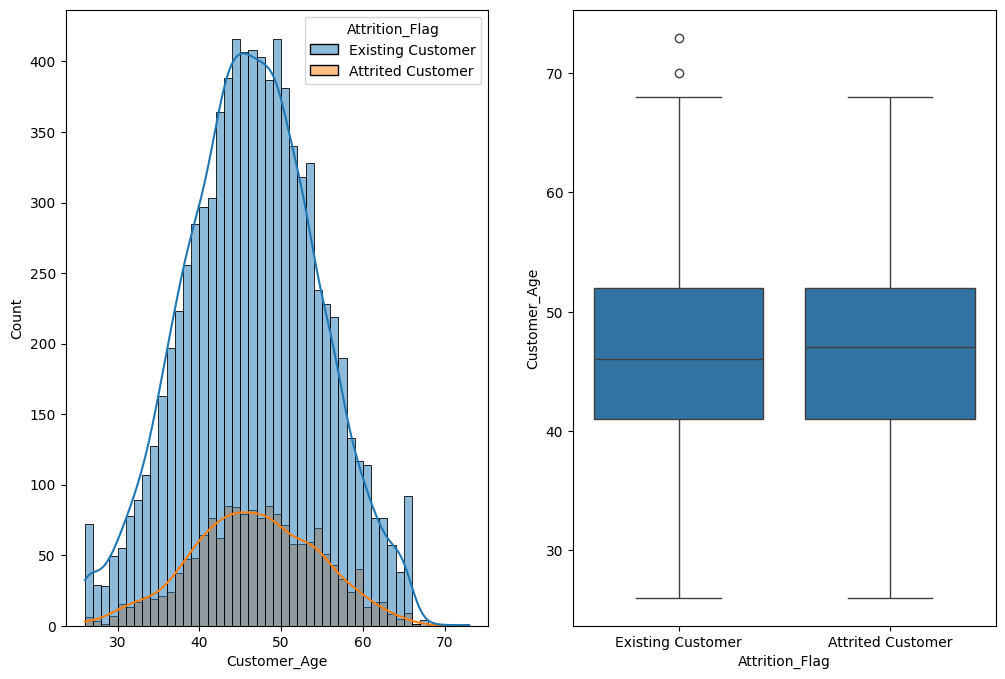

In [259]:
plot_num('Customer_Age')

Nhìn vào hình ta thấy đa số khách hàng rời bỏ thẻ tín dụng ở độ tuổi 40-55.

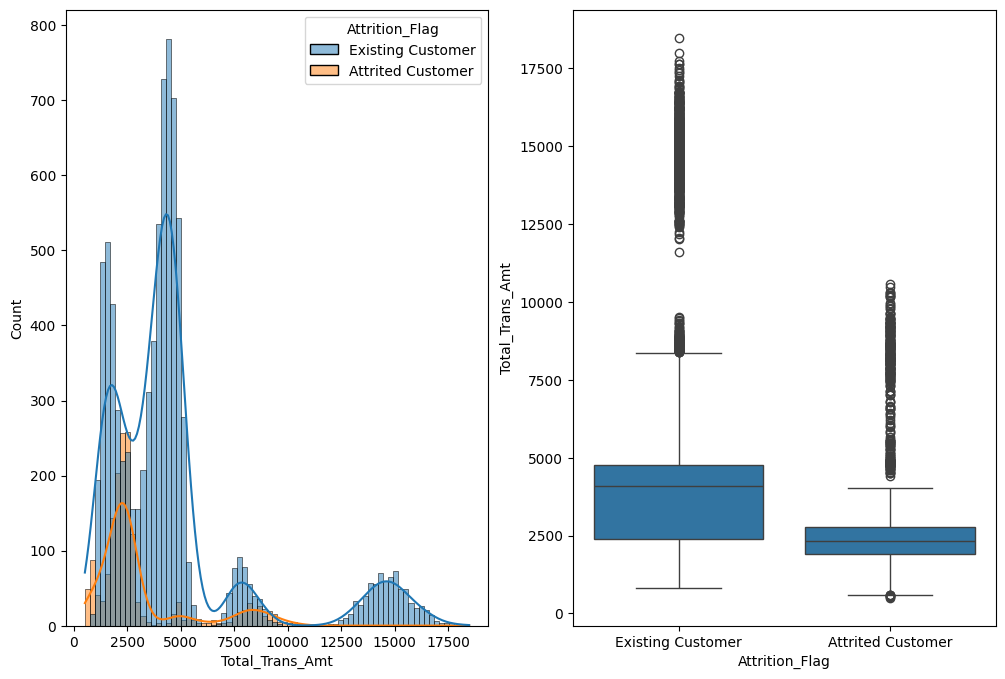

In [260]:
plot_num('Total_Trans_Amt')

Nhìn vào đây ta thấy đa số khách hàng rời bỏ giảm dần theo tổng mức chi tiêu thẻ tín dụng. Khách hàng có tổng mức chi tiêu thẻ tín dụng nằm ở khoảng dưới 5000 có tỷ lệ rời bỏ thẻ tín dụng cao nhất.

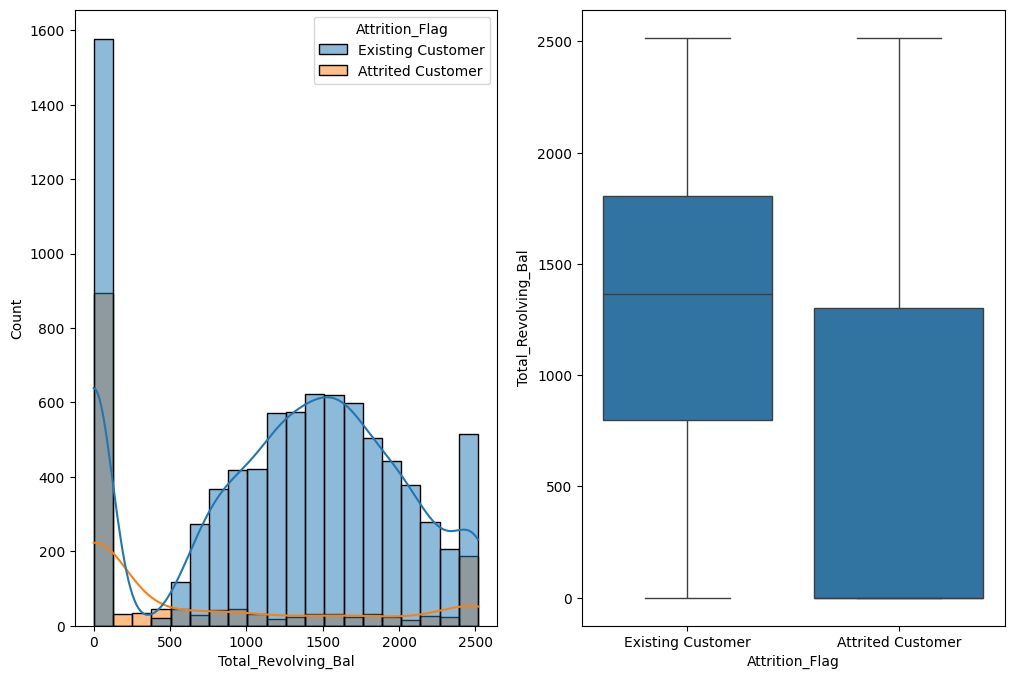

In [261]:
plot_num('Total_Revolving_Bal') #

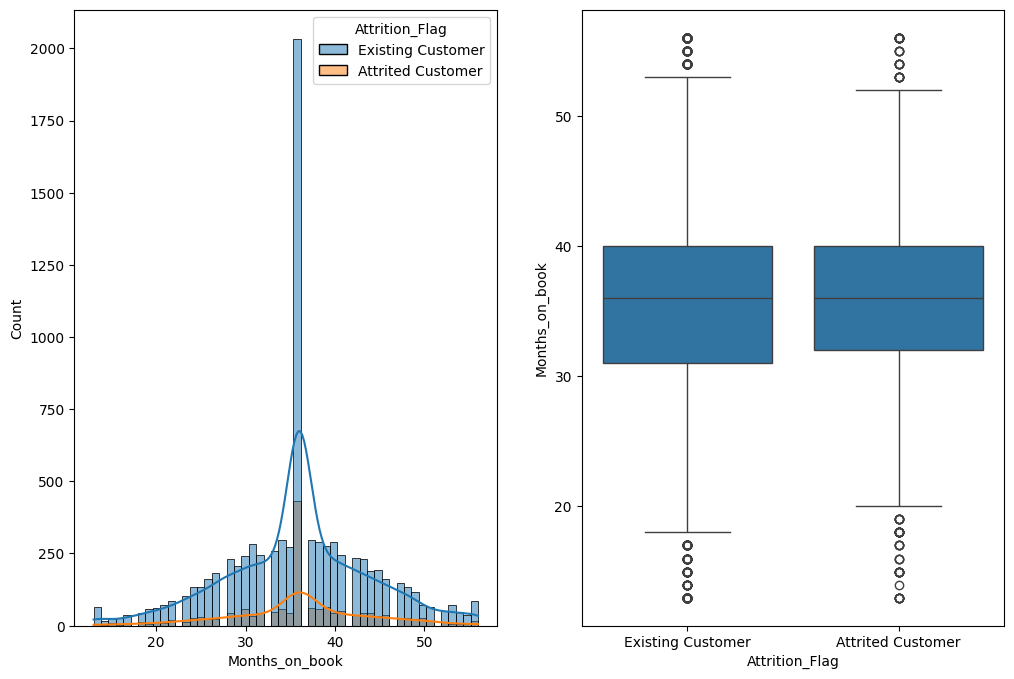

In [262]:
plot_num('Months_on_book')

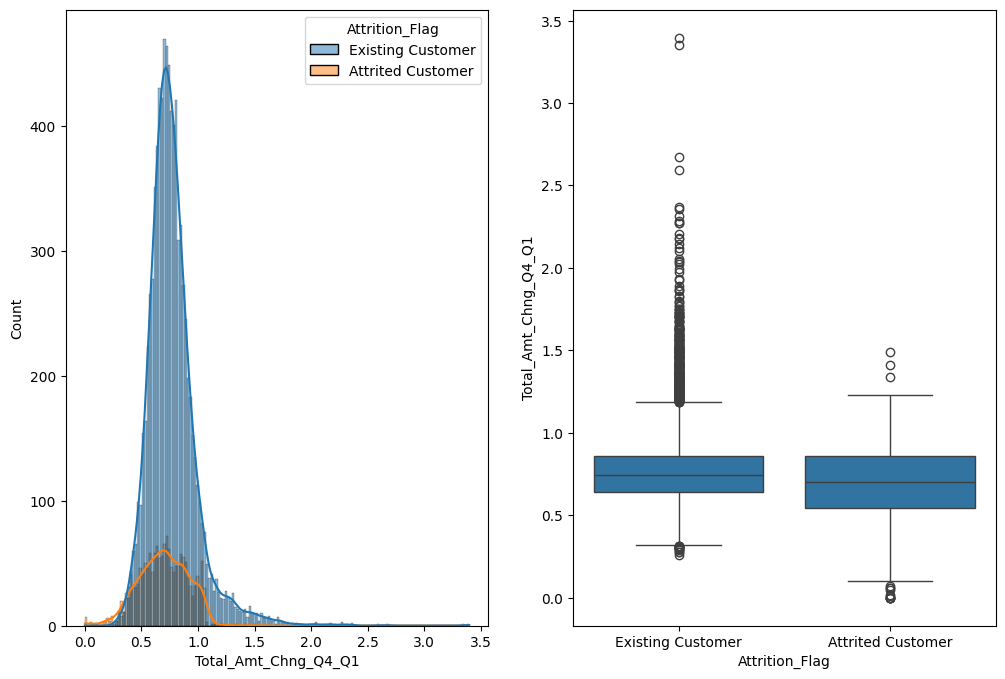

In [263]:
plot_num('Total_Amt_Chng_Q4_Q1')

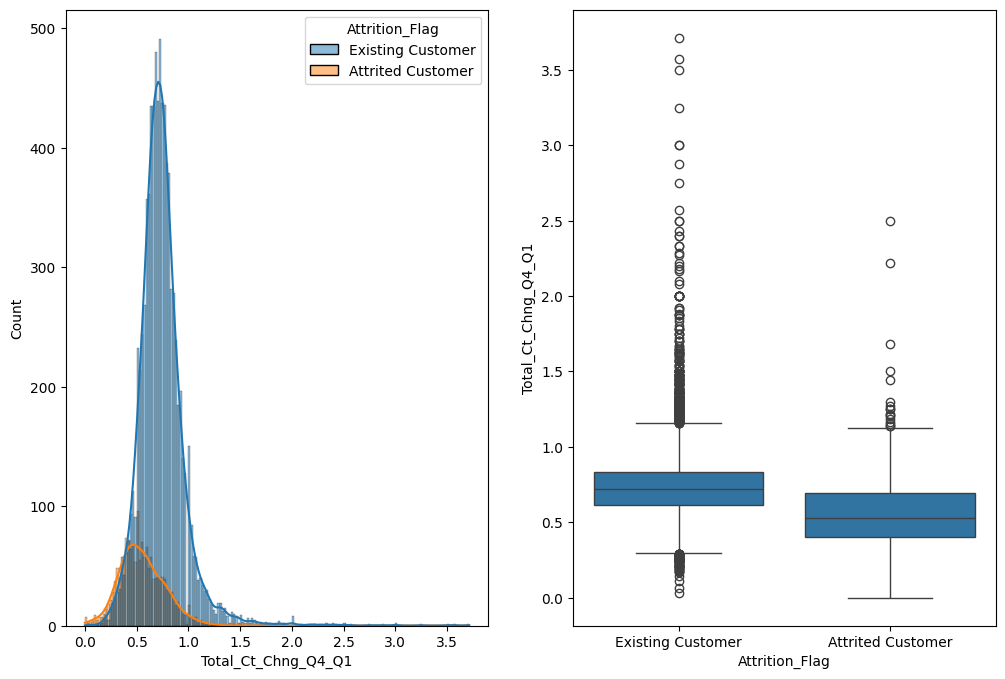

In [295]:
plot_num('Total_Ct_Chng_Q4_Q1')

In [297]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

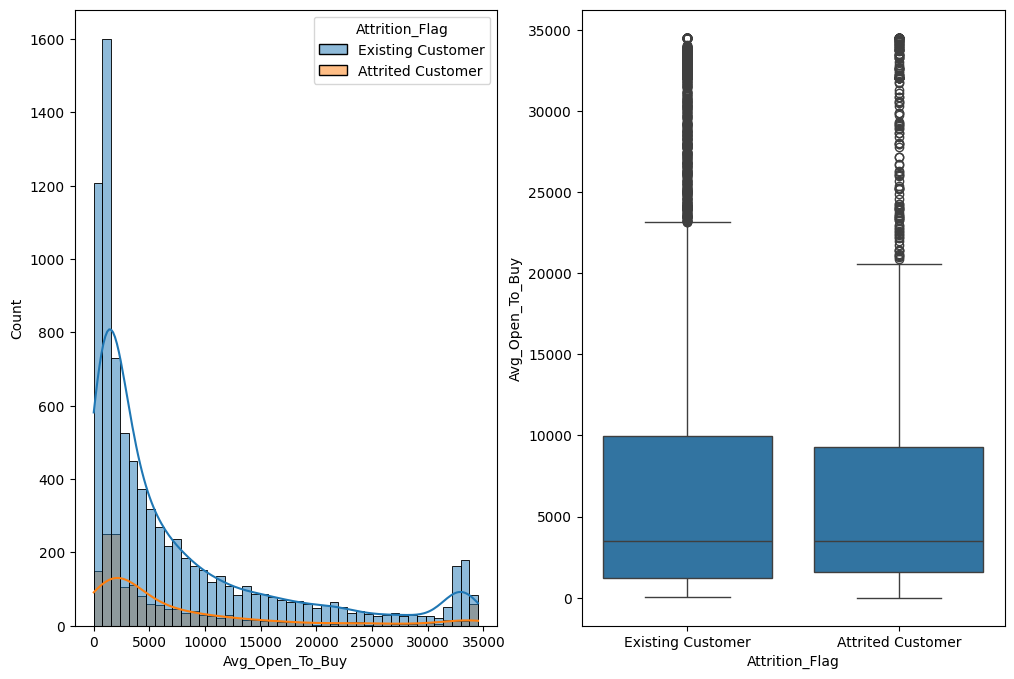

In [303]:
plot_num('Avg_Open_To_Buy')



### DỰ báo
1. Chuẩn hóa dữ liệu
2. Phân nhóm
3. Chọn đặc tính liên quan
4. Lập mô hình
5. Chạy mô hình
6. Kiểm tra

In [265]:
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [266]:
from sklearn.impute import SimpleImputer

df1 = df.copy()


categorical_columns = ['Gender', 'Attrition_Flag', 'Card_Category', 'Income_Category', 'Marital_Status', 'Education_Level', 'Attrition_Flag']
mappings = {
    "card_cat": {"Blue": 0, "Silver": 1, "Gold": 2, "Platinum": 3},
    "income_cat": {
        "Less than $40K": 0,
        "$40K - $60K": 1,
        "$60K - $80K": 2,
        "$80K - $120K": 3,
        "$120K +": 4,
    },
    "gender": {"F": 0, "M": 1},
    "att_flag": {"Existing Customer": 0, "Attrited Customer": 1},
    "marital_status": {"Single": 0, "Married": 1, "Divorced": 2},
    "educt_level": {
        "Uneducated": 0,
        "High School": 1,
        "College": 2,
        "Graduate": 3,
        "Post-Graduate": 4,
        "Doctorate": 5,
    },
    "Attrition_Flag": {"Existing Customer": 0, "Attrited Customer": 1},
}

    
replace_un = {'Unknown': np.nan}
df['Education_Level'].replace(replace_un, inplace=True)
#df[]'].replace(replace_un, inplace=True)
df1['Education_Level'].replace(replace_un, inplace=True)
df1['Income_Category'].replace(replace_un, inplace=True)
df1['Marital_Status'].replace(replace_un, inplace=True)

imp = SimpleImputer(strategy="most_frequent")
df1[['Education_Level']] = imp.fit_transform(df1[['Education_Level']])

df1[['Marital_Status']] = imp.fit_transform(df1[['Marital_Status']])

df1[['Income_Category']] = imp.fit_transform(df1[['Income_Category']])


for col, mapping in mappings.items():
    df1.replace(mapping, inplace=True)
    
for i in categorical_columns:
    print(f'{i}: {df1[i].unique()}')

df1

Gender: [1 0]
Attrition_Flag: [0 1]
Card_Category: [0 2 1 3]
Income_Category: [2 0 3 1 4]
Marital_Status: [1 0 2]
Education_Level: [1 3 0 2 4 5]
Attrition_Flag: [0 1]


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,0,45,1,3,1,1,2,0,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,0,49,0,5,3,0,0,0,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,0,51,1,3,3,1,3,0,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,0,40,0,4,1,1,0,0,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,0,40,1,3,0,1,2,0,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,0,50,1,2,3,0,1,0,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,1,41,1,2,3,2,1,0,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,1,44,0,1,1,1,0,0,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,1,30,1,2,3,1,1,0,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


<Axes: >

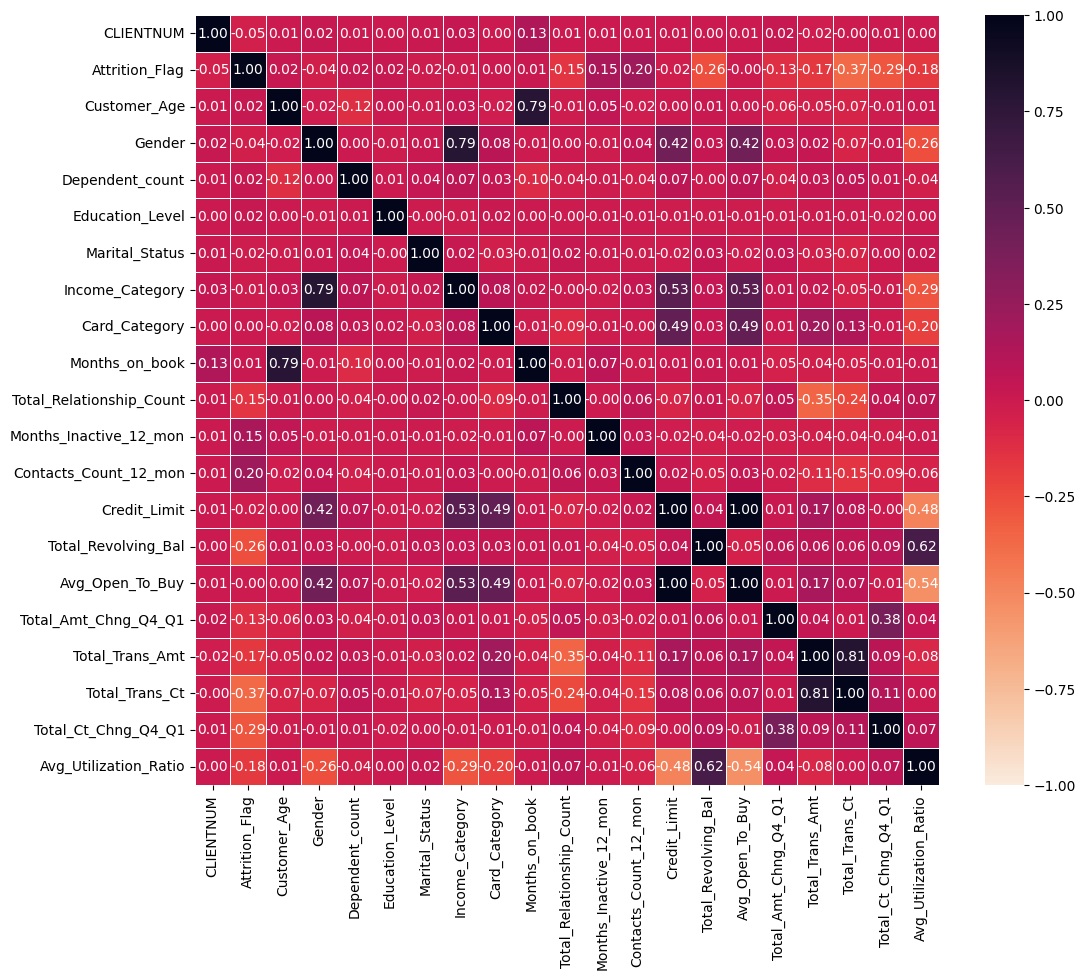

In [308]:
df1.drop('CLIENTNUM', axis = 1)
corr_matrix_df = df1.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix_df, vmin= -1, vmax= 1, linewidths=0.5, cmap='rocket_r', annot=True, fmt='.2f') 


Các biến liên hệ cao va biến Attriton_Flag (nhận xet...)

In [268]:
%pip install scikit_learn
%pip install imblearn

Note: you may need to restart the kernel to use updated packages.



In [269]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report


In [270]:
df1.head()
col_to_scal = ['Customer_Age','Months_on_book','Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Trans_Amt','Total_Amt_Chng_Q4_Q1','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1']
scaler =  MinMaxScaler()
df1[col_to_scal] = scaler.fit_transform(df1[col_to_scal])
df1.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,0,0.404255,1,3,1,1,2,0,0.604651,...,1,3,0.340190,0.308701,0.345116,0.392994,0.035273,0.248062,0.437534,0.061
1,818770008,0,0.489362,0,5,3,0,0,0,0.720930,...,1,2,0.206112,0.343266,0.214093,0.453636,0.043452,0.178295,1.000000,0.105
2,713982108,0,0.531915,1,3,3,1,3,0,0.534884,...,1,0,0.059850,0.000000,0.098948,0.763615,0.076611,0.077519,0.628164,0.000
3,769911858,0,0.297872,0,4,1,1,0,0,0.488372,...,4,1,0.056676,1.000000,0.022977,0.413600,0.036775,0.077519,0.628164,0.760
4,709106358,0,0.297872,1,3,0,1,2,0,0.186047,...,1,0,0.099091,0.000000,0.136557,0.640271,0.017025,0.139535,0.673129,0.000


In [271]:
x = df1.drop(columns=['Attrition_Flag'])
y = df1['Attrition_Flag']

'\nn_estimators=250 sets the number of trees in the forest to 250. This parameter determines how many decision trees the random forest algorithm will create. Increasing the number of trees can improve the performance of the model, but it will also increase the computation time.\nmax_depth=1 sets the maximum depth of the trees to 1. This parameter determines how deep the decision trees in the forest can grow. A lower value for max_depth will result in simpler trees, which can help prevent overfitting. However, if the value is too low, the model may not be able to capture the complexity of the data.\nrandom_state=0 sets the seed used by the random\n'

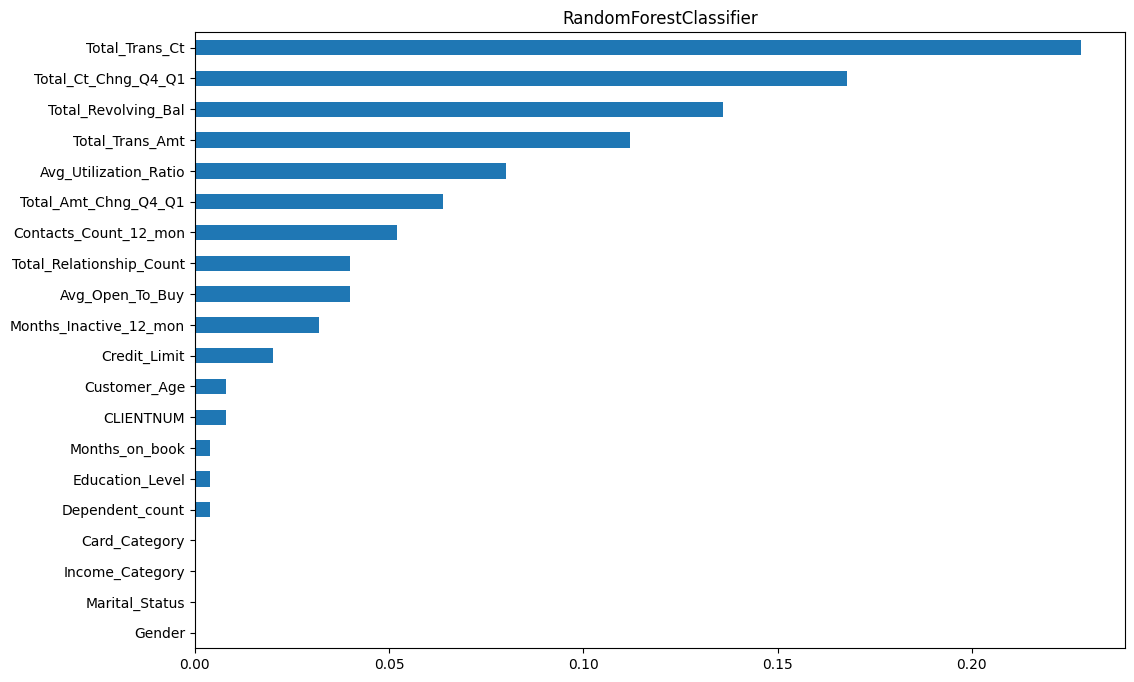

In [272]:
model_rf = RandomForestClassifier(n_estimators=250, max_depth = 1, random_state=0)
model_rf.fit(x,y)
temp = pd.Series(model_rf.feature_importances_, index=x.columns).sort_values(ascending=True)
temp.plot(kind ='barh')
plt.title('RandomForestClassifier')

"""
n_estimators=250 sets the number of trees in the forest to 250. This parameter determines how many decision trees the random forest algorithm will create. Increasing the number of trees can improve the performance of the model, but it will also increase the computation time.
max_depth=1 sets the maximum depth of the trees to 1. This parameter determines how deep the decision trees in the forest can grow. A lower value for max_depth will result in simpler trees, which can help prevent overfitting. However, if the value is too low, the model may not be able to capture the complexity of the data.
random_state=0 sets the seed used by the random
"""

In [273]:
df_fi = df1[temp[temp > 0.1].index]
df_fi.head()
df_scaled = pd.concat([df_fi,df1[['Attrition_Flag']]], axis=1)
df_scaled

,Total_Trans_Amt,Total_Revolving_Bal,Total_Ct_Chng_Q4_Q1,Total_Trans_Ct,Attrition_Flag
0,0.035273,0.308701,0.437534,0.248062,0
1,0.043452,0.343266,1.000000,0.178295,0
2,0.076611,0.000000,0.628164,0.077519,0
3,0.036775,1.000000,0.628164,0.077519,0
4,0.017025,0.000000,0.673129,0.139535,0
...,...,...,...,...,...
10122,0.832647,0.735399,0.230749,0.829457,0
10123,0.459219,0.868494,0.183899,0.457364,1
10124,0.544175,0.000000,0.220248,0.387597,1
10125,0.438689,0.000000,0.194400,0.403101,1


In [285]:
#imbalance Data
df_class_1 = df_scaled[df_scaled['Attrition_Flag'] == 1]
df_class_0 = df_scaled[df_scaled['Attrition_Flag'] == 0]
count_class_0, count_class_1 = df1['Attrition_Flag'].value_counts()
df_class_0


,Total_Trans_Amt,Total_Revolving_Bal,Total_Ct_Chng_Q4_Q1,Total_Trans_Ct,Attrition_Flag
0,0.035273,0.308701,0.437534,0.248062,0
1,0.043452,0.343266,1.000000,0.178295,0
2,0.076611,0.000000,0.628164,0.077519,0
3,0.036775,1.000000,0.628164,0.077519,0
4,0.017025,0.000000,0.673129,0.139535,0
...,...,...,...,...,...
10116,0.825860,0.890346,0.250673,0.790698,0
10117,0.945143,0.758443,0.220786,0.782946,0
10120,0.838266,0.837902,0.203016,0.806202,0
10121,0.783688,0.240763,0.212978,0.852713,0


In [287]:
df_class_1_over = df_class_1.sample(count_class_0, replace = True)
df_test_over = pd.concat([df_class_1_over, df_class_0 ], axis = 0)
df_class_1_over.shape
df_test_over

,Total_Trans_Amt,Total_Revolving_Bal,Total_Ct_Chng_Q4_Q1,Total_Trans_Ct,Attrition_Flag
3788,0.068377,0.000000,0.125740,0.263566,1
3157,0.088350,0.863727,0.157781,0.279070,1
7846,0.071993,0.586412,0.069736,0.186047,1
9758,0.447257,0.000000,0.210016,0.488372,1
9942,0.401636,0.000000,0.269251,0.558140,1
...,...,...,...,...,...
10116,0.825860,0.890346,0.250673,0.790698,0
10117,0.945143,0.758443,0.220786,0.782946,0
10120,0.838266,0.837902,0.203016,0.806202,0
10121,0.783688,0.240763,0.212978,0.852713,0


In [288]:
X = df_test_over.drop("Attrition_Flag", axis=1)
y = df_test_over["Attrition_Flag"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape)
y_train.value_counts()

(17000, 4) (11900, 4) (5100, 4) (11900,) (5100,)


Attrition_Flag
1    5950
0    5950
Name: count, dtype: int64

In [289]:
dict ={
'logisticRegression' : LogisticRegression(),
'DecisionTreeClassifier' : DecisionTreeClassifier(),
'SVM' : SVC()
}
for model, algorithm in dict.items():
    temp = algorithm
    algorithm.fit(X_train, y_train)
    acc = algorithm.score(X_test, y_test)
    y_pred = algorithm.predict(X_test)
    cl_rep = classification_report(y_test, y_pred)
    print(y_pred)
    print(f'Score of {model}: {acc}')
    print(cl_rep)

[0 1 0 ... 0 0 0]
Score of logisticRegression: 0.812156862745098
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      2550
           1       0.81      0.82      0.81      2550

    accuracy                           0.81      5100
   macro avg       0.81      0.81      0.81      5100
weighted avg       0.81      0.81      0.81      5100

[0 1 0 ... 0 0 0]
Score of DecisionTreeClassifier: 0.9684313725490196
              precision    recall  f1-score   support

           0       0.99      0.94      0.97      2550
           1       0.95      0.99      0.97      2550

    accuracy                           0.97      5100
   macro avg       0.97      0.97      0.97      5100
weighted avg       0.97      0.97      0.97      5100

[0 1 1 ... 0 0 0]
Score of SVM: 0.8870588235294118
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      2550
           1       0.88      0.89      0.89      25

Confusion matrix:

[[2401  149]
 [  15 2535]]



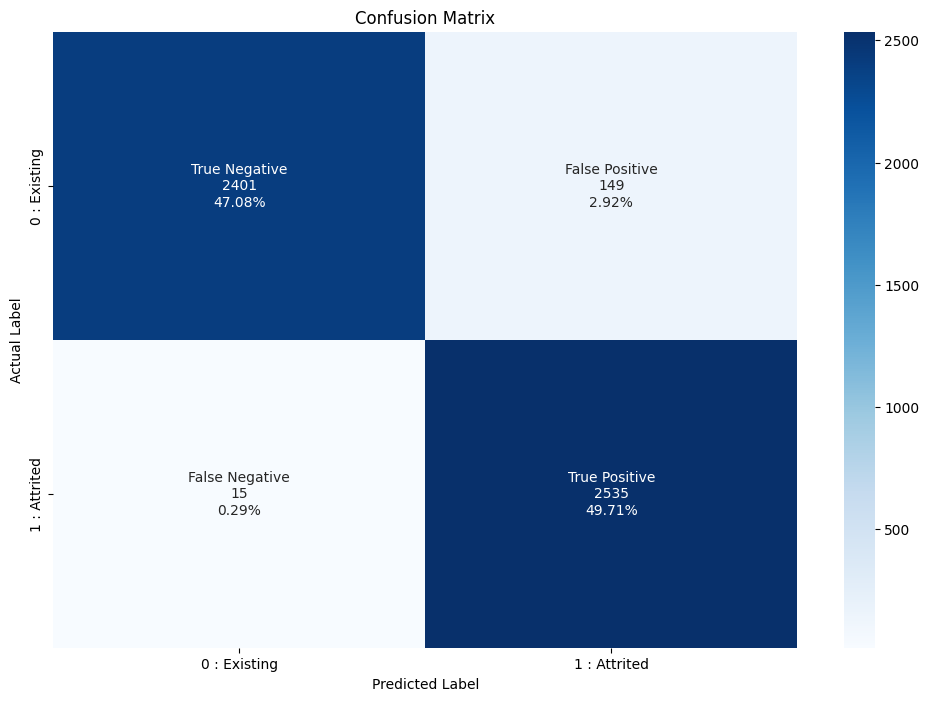


Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.94      0.97      2550
           1       0.94      0.99      0.97      2550

    accuracy                           0.97      5100
   macro avg       0.97      0.97      0.97      5100
weighted avg       0.97      0.97      0.97      5100


Accuracy score (XGBoost model) = 0.9678 (96.78%)


In [294]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score

dct_model = DecisionTreeClassifier()
dct_model.fit(X_train, y_train)
y_pred = dct_model.predict(X_test)

# Create confusion matrix using predicted and actual values
conf = confusion_matrix(y_test, y_pred)
print(f"Confusion matrix:\n\n{conf}\n")

# Plot confusion matrix
group_names = ['True Negative', 'False Positive','False Negative','True Positive']
categories = ['0 : Existing', '1 : Attrited']

group_counts = ["{0:0.0f}".format(value) for value in conf.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in conf.flatten()/np.sum(conf)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.array([labels]).reshape(2,2)

sns.heatmap(conf, annot=labels, fmt='', cmap='Blues',
            xticklabels=categories, yticklabels=categories)
plt.xlabel(f"Predicted Label")

plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

# Display classification report
conf_rp = classification_report(y_test, y_pred)
print(f"\nClassification Report:\n")
print(f"{conf_rp}\n")

# Display Accuracy score using XGBoost model
acs = accuracy_score(y_test, y_pred)
print(f"Accuracy score (XGBoost model) = {acs:.4f} ({acs:.2%})")


In [ ]:
print(df1)
print('__________________________')
print(df)

NameError: name 'df1' is not defined